In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore", module="matplotlib")
f_size=32
mpl.rcParams['xtick.labelsize']=f_size
mpl.rcParams['ytick.labelsize']=f_size
mpl.rcParams['axes.labelweight']='light'
mpl.rcParams['axes.labelsize']=f_size
mpl.rcParams['font.size']=f_size
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Helvetica'
mpl.rcParams['font.style']='normal'
mpl.rcParams['font.weight']='light'
mpl.rcParams['figure.dpi']=600
mpl.rcParams['figure.figsize']=(1.0,1.0)
mpl.rcParams['legend.frameon']=False;
mpl.rcParams['figure.autolayout']=True;
mpl.rcParams['xtick.major.size']=10;
mpl.rcParams['xtick.major.width']=1.5
mpl.rcParams['xtick.minor.size']=6;
mpl.rcParams['xtick.minor.width']=1
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.major.width']=1.5
mpl.rcParams['ytick.minor.size']=4;
mpl.rcParams['ytick.minor.width']=1
mpl.rcParams['legend.fontsize']=f_size
#mpl.rcParams['text.fontsize'] =f_size
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Helvetica'
colors=['black','Coral','Red','DarkOrange','Brown','Gold','MediumSeaGreen','Green','LightSeaGreen',
       'SteelBlue','Blue','Navy','DarkViolet','DeepPink']

#import mpld3
#mpld3.enable_notebook()
import pandas as pd
import numpy as np
engine='python'

# $MoSe_2$ Bulk Structure

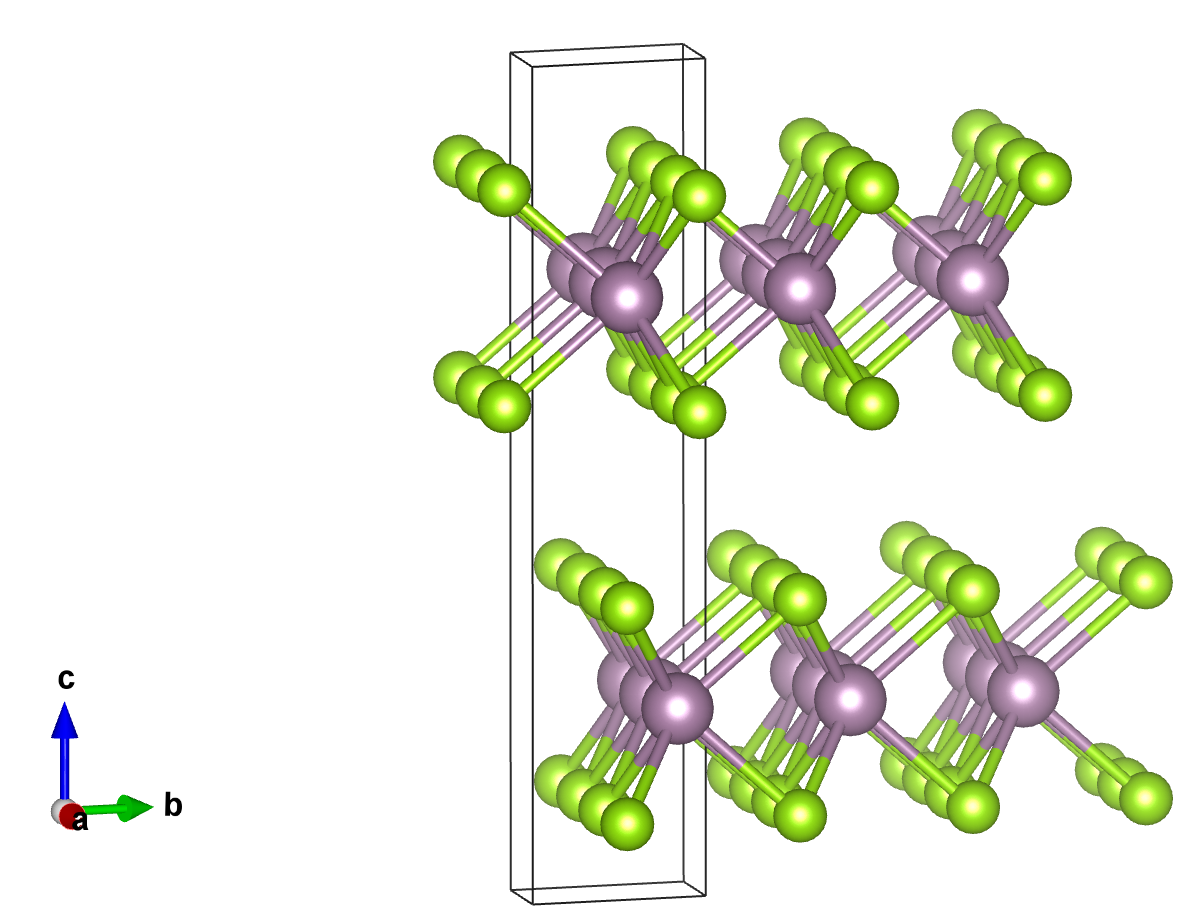

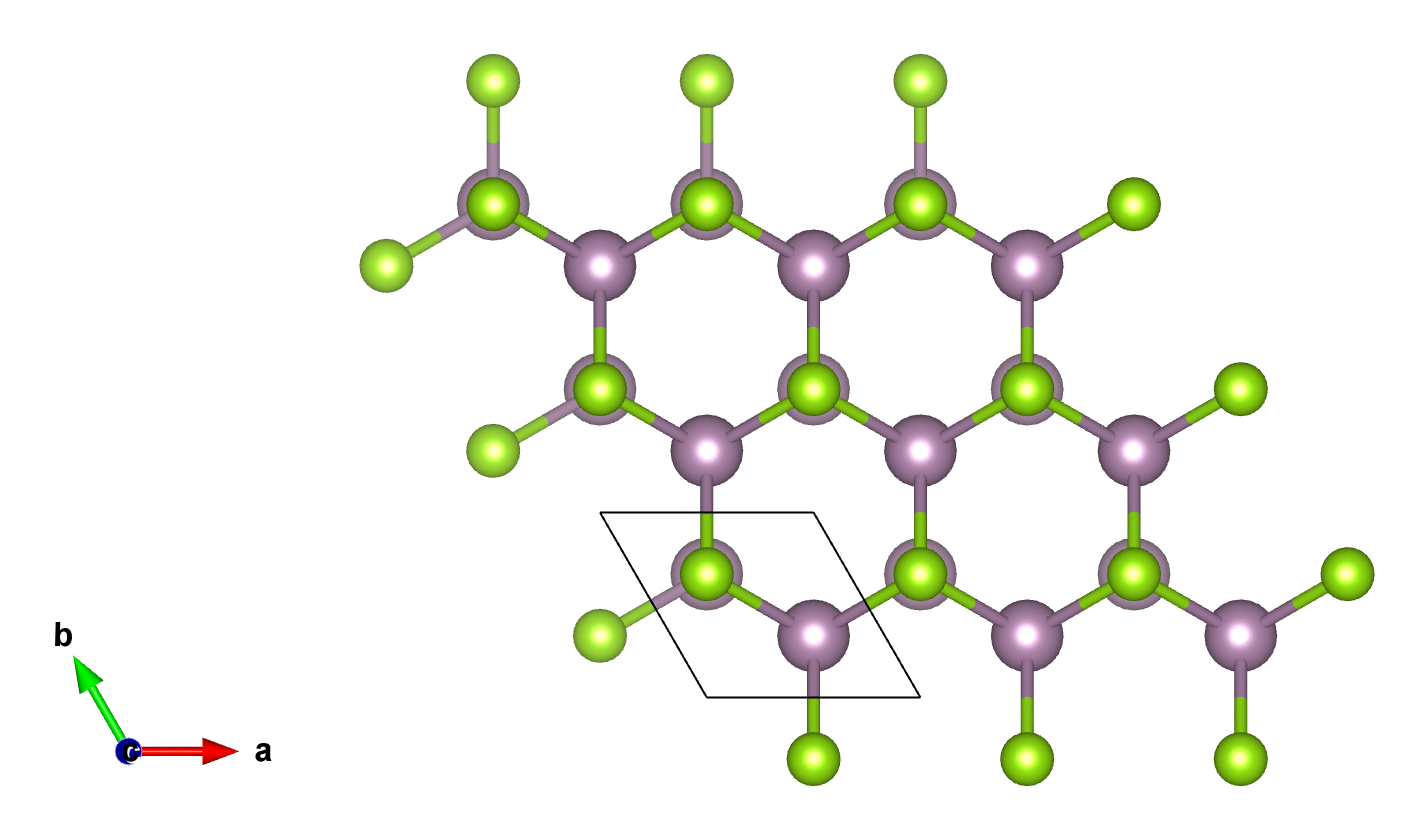

In [2]:
from IPython.display import Image
from IPython.display import display
I1=Image(filename='../../../MoSe2/Bulk_MoSe2_a.png',width=500)
I2=Image(filename='../../../MoSe2/Bulk_MoSe2_c.png',width=500)
display(I1,I2)

# Energy/Force Convergence: ecutwfc

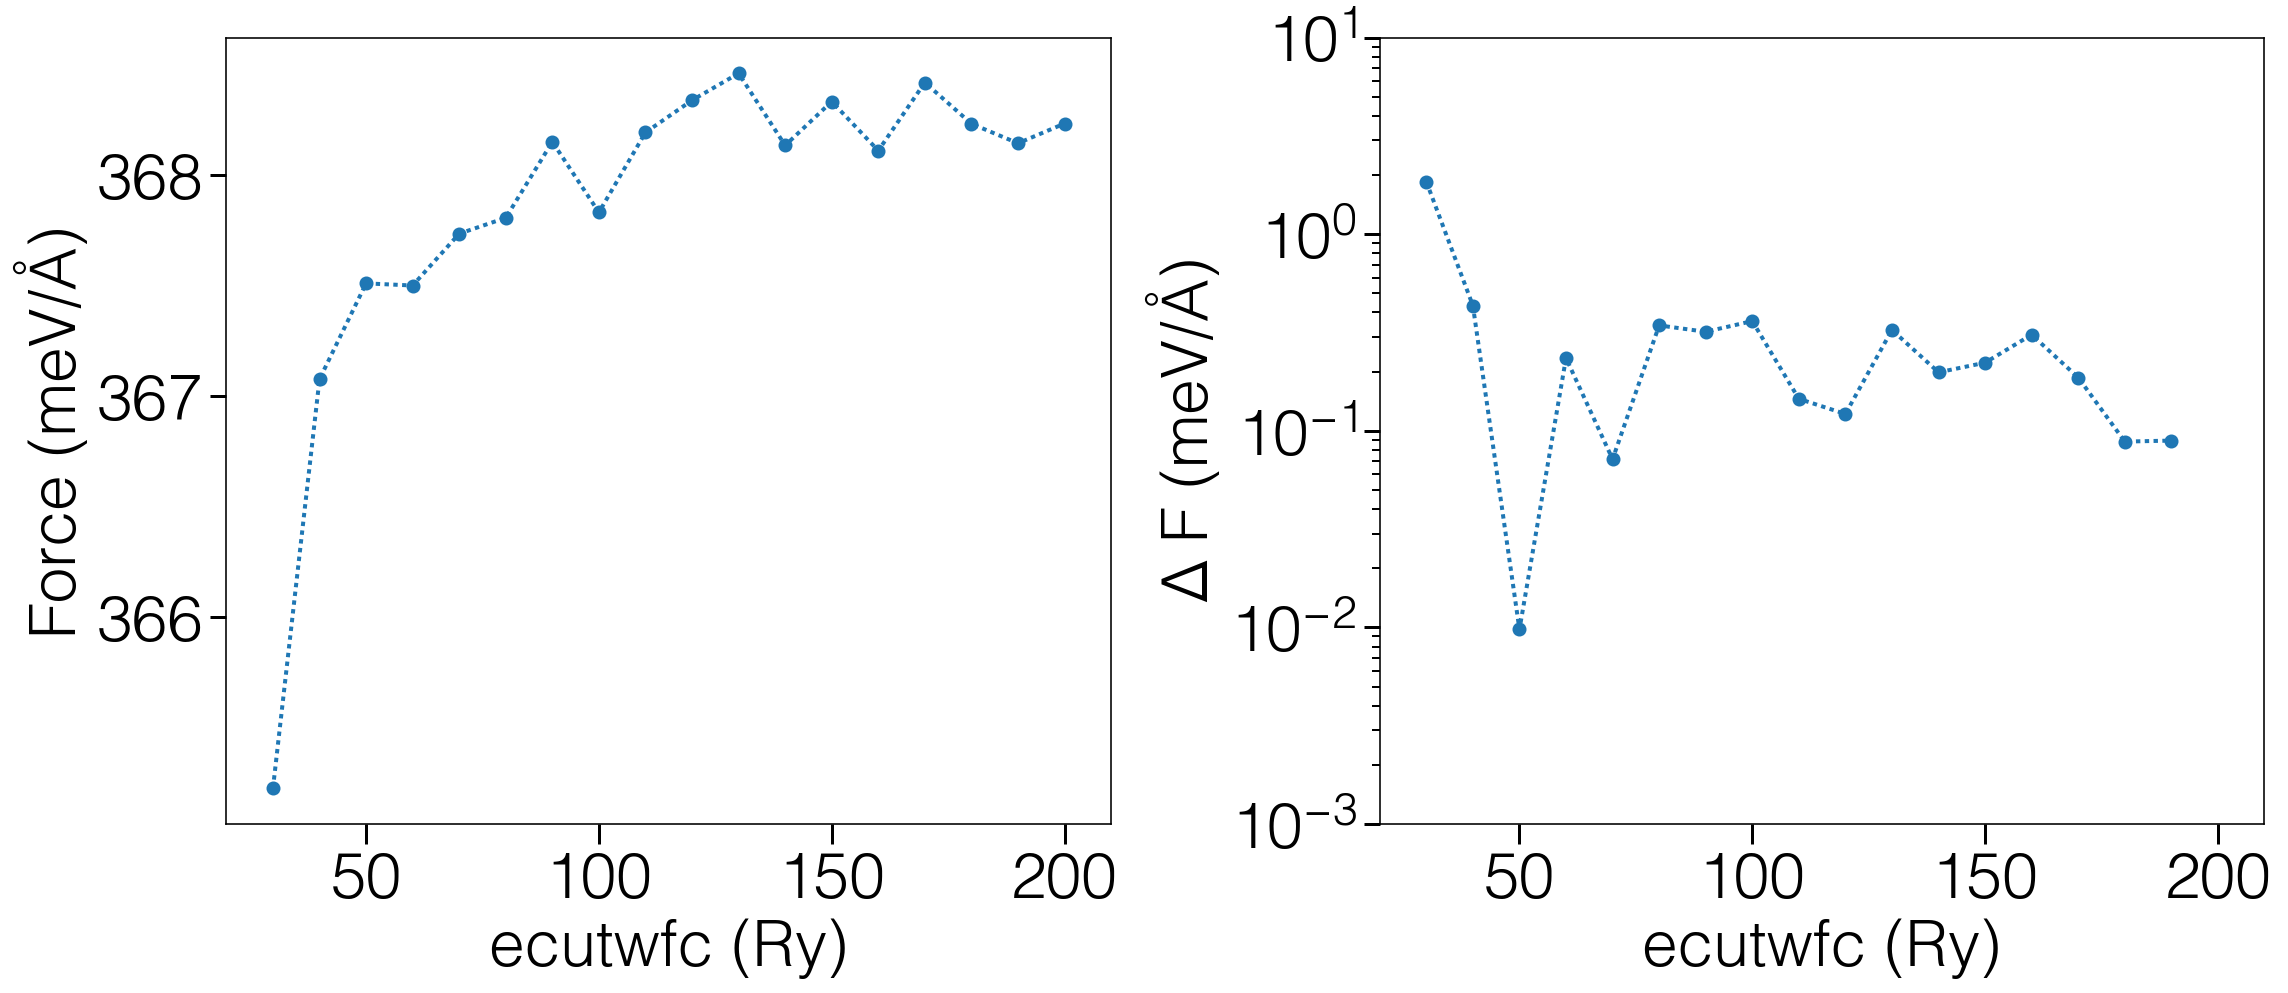

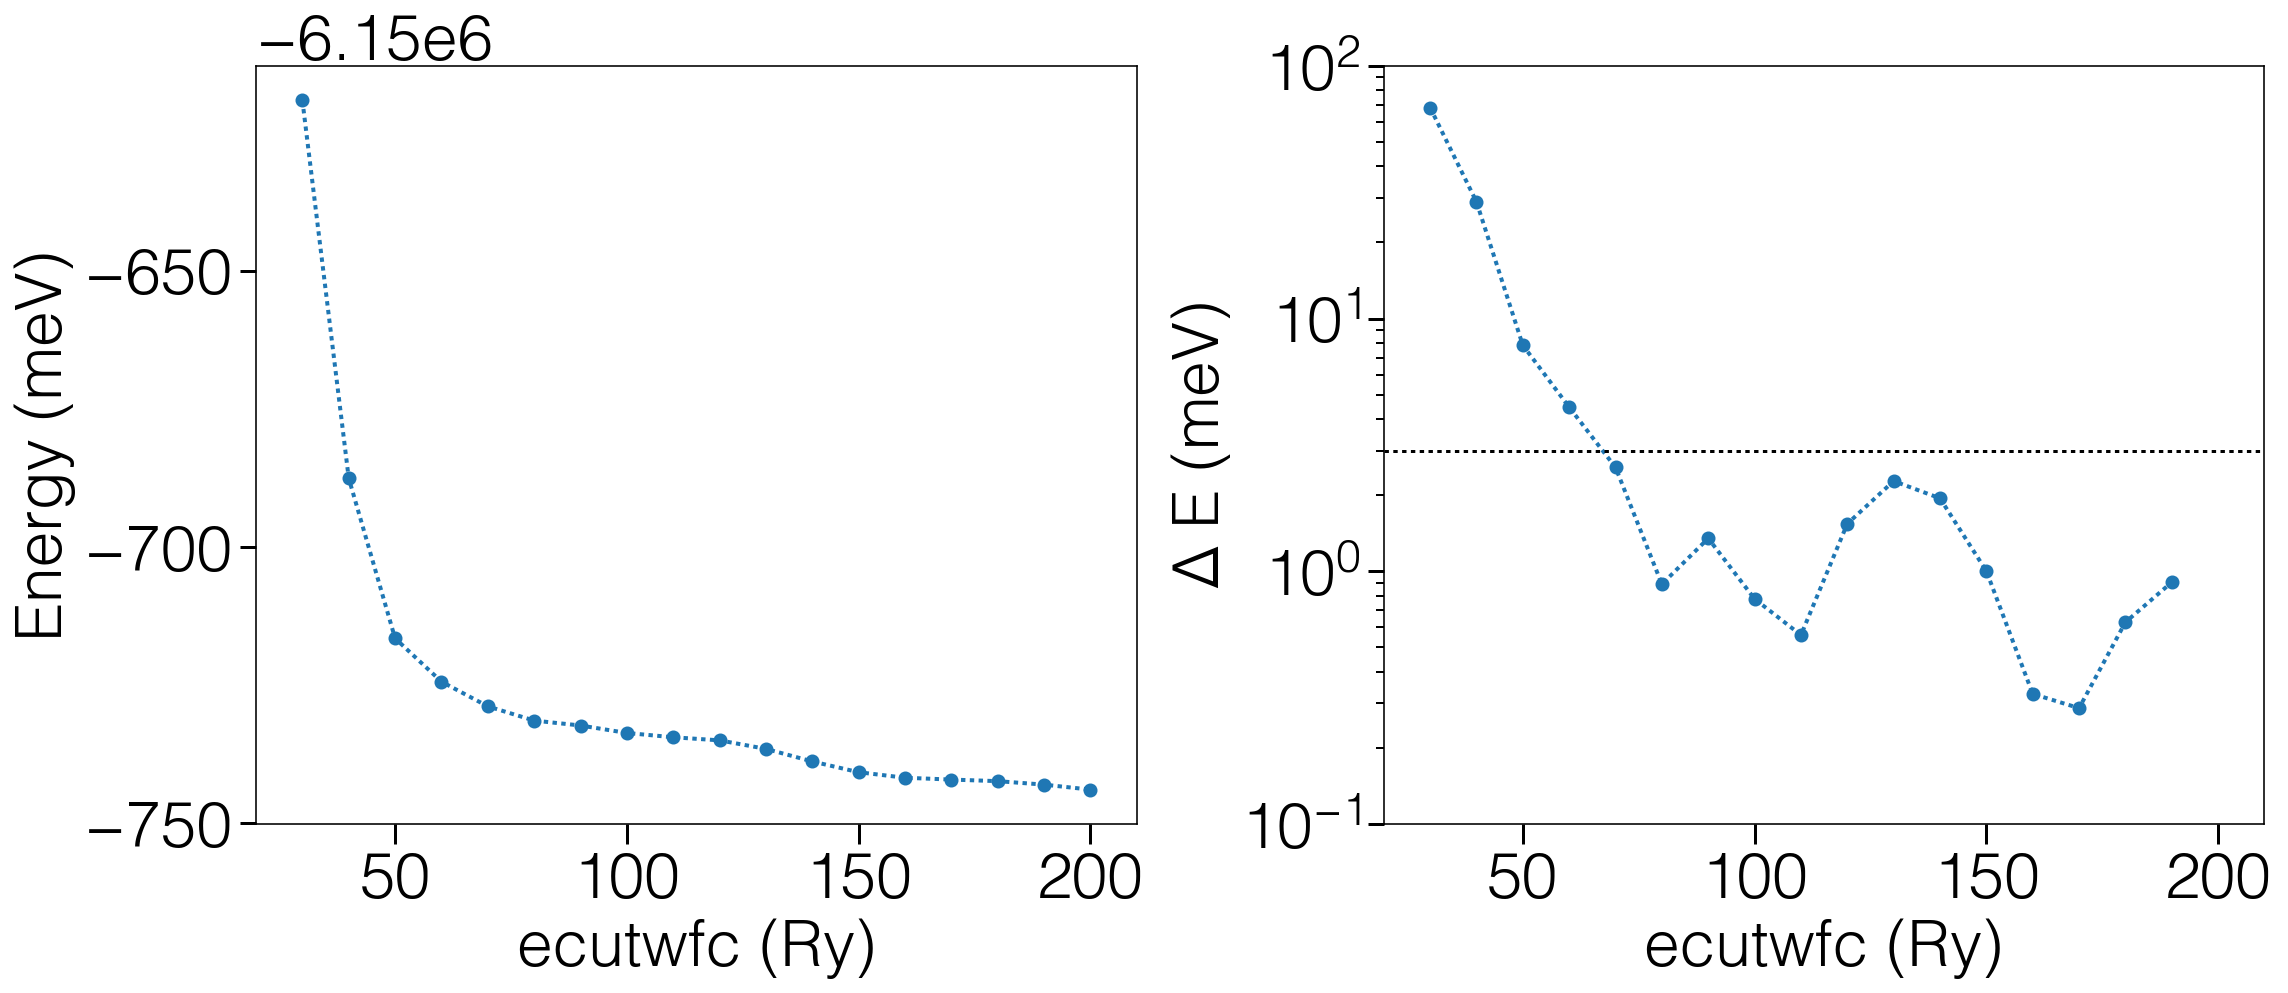

In [15]:
%matplotlib inline
# Convergence Function
def conv(arr):
    arr_conv=abs(arr[1::]-arr[0:-1:])
    arr_conv=np.append(arr_conv,None)
    return arr_conv
# Read data files
path='../../../MoSe2/Bulk/Relaxed/relax/'

f_1A='ecut_F_E.txt'
data_1A=pd.read_csv(path+f_1A,delimiter='\t\t',names=['ecutwfc (Ry)','Force (Ry/Bohr)','Energy (Ry)'],
                    skiprows=[0],engine='python');

# Convert to Ev-s and AA-s
ry2eV=13.605698
bohr2AA=0.529177
data_1A['Force (meV/Å)']=data_1A['Force (Ry/Bohr)']*ry2eV*10**3/bohr2AA
data_1A['Energy (meV)']=data_1A['Energy (Ry)']*ry2eV*10**3

# Convergence
Delta_alat_vec=np.array([])
data_1A['Force_conv']=conv(np.array(data_1A['Force (meV/Å)'].values))
data_1A['Energy_conv']=conv(np.array(data_1A['Energy (meV)'].values))

# Force Plot
fig1=plt.figure(figsize=(16,7))
ax1=fig1.add_subplot(121)
ax1.plot(data_1A['ecutwfc (Ry)'],data_1A['Force (meV/Å)'],linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([5.39,5.4])
ax1.set_xlim([20,210])
ax1.set_xlabel('ecutwfc (Ry)')
ax1.set_ylabel('Force (meV/Å)')

ax2=fig1.add_subplot(122)
ax2.semilogy(data_1A['ecutwfc (Ry)'].values[:-1:],data_1A['Force_conv'].values[:-1:],linewidth=2,marker='o',linestyle=':')
ax2.set_ylim([10**-3,10**1])
ax2.set_xlim([20,210])
ax2.set_xlabel('ecutwfc (Ry)')
ax2.set_ylabel(r'$\Delta$ F (meV/Å)')

# Energy Plot
fig1=plt.figure(figsize=(16,7))
ax1=fig1.add_subplot(121)
ax1.plot(data_1A['ecutwfc (Ry)'],data_1A['Energy (meV)'],linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([5.39,5.4])
ax1.set_xlim([20,210])
ax1.set_xlabel('ecutwfc (Ry)')
ax1.set_ylabel('Energy (meV)')

ax2=fig1.add_subplot(122)
ax2.semilogy(data_1A['ecutwfc (Ry)'].values[:-1:],data_1A['Energy_conv'].values[:-1:],linewidth=2,marker='o',linestyle=':')
ax2.set_ylim([10**-1,10**2])
ax2.set_xlim([20,210])
ax2.set_xlabel('ecutwfc (Ry)')
ax2.set_ylabel(r'$\Delta$ E (meV)')
ax2.axhline(3,linestyle=':',color='k')

$\color{red}{\text{ecuwfc = 70}}$

# Energy/Force Convergence: k

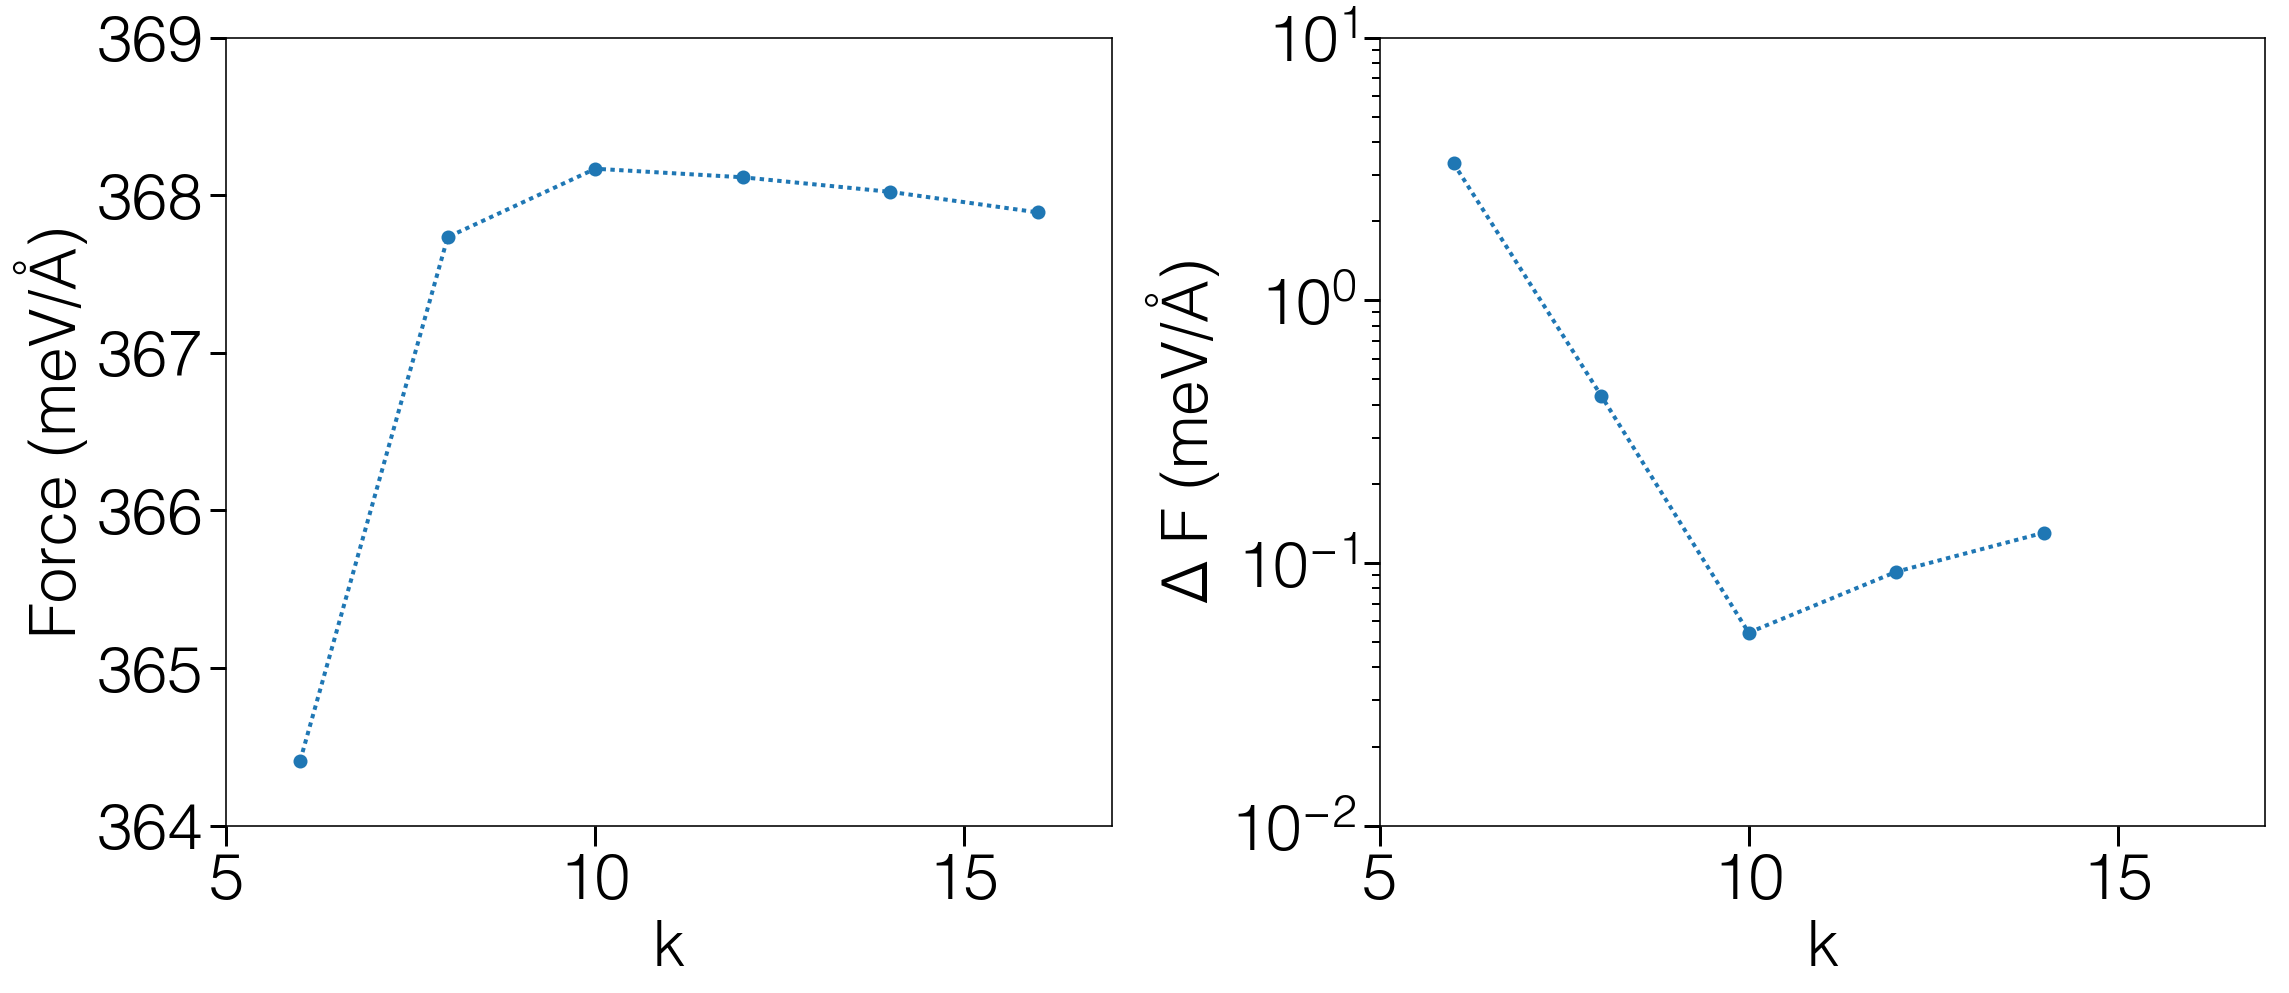

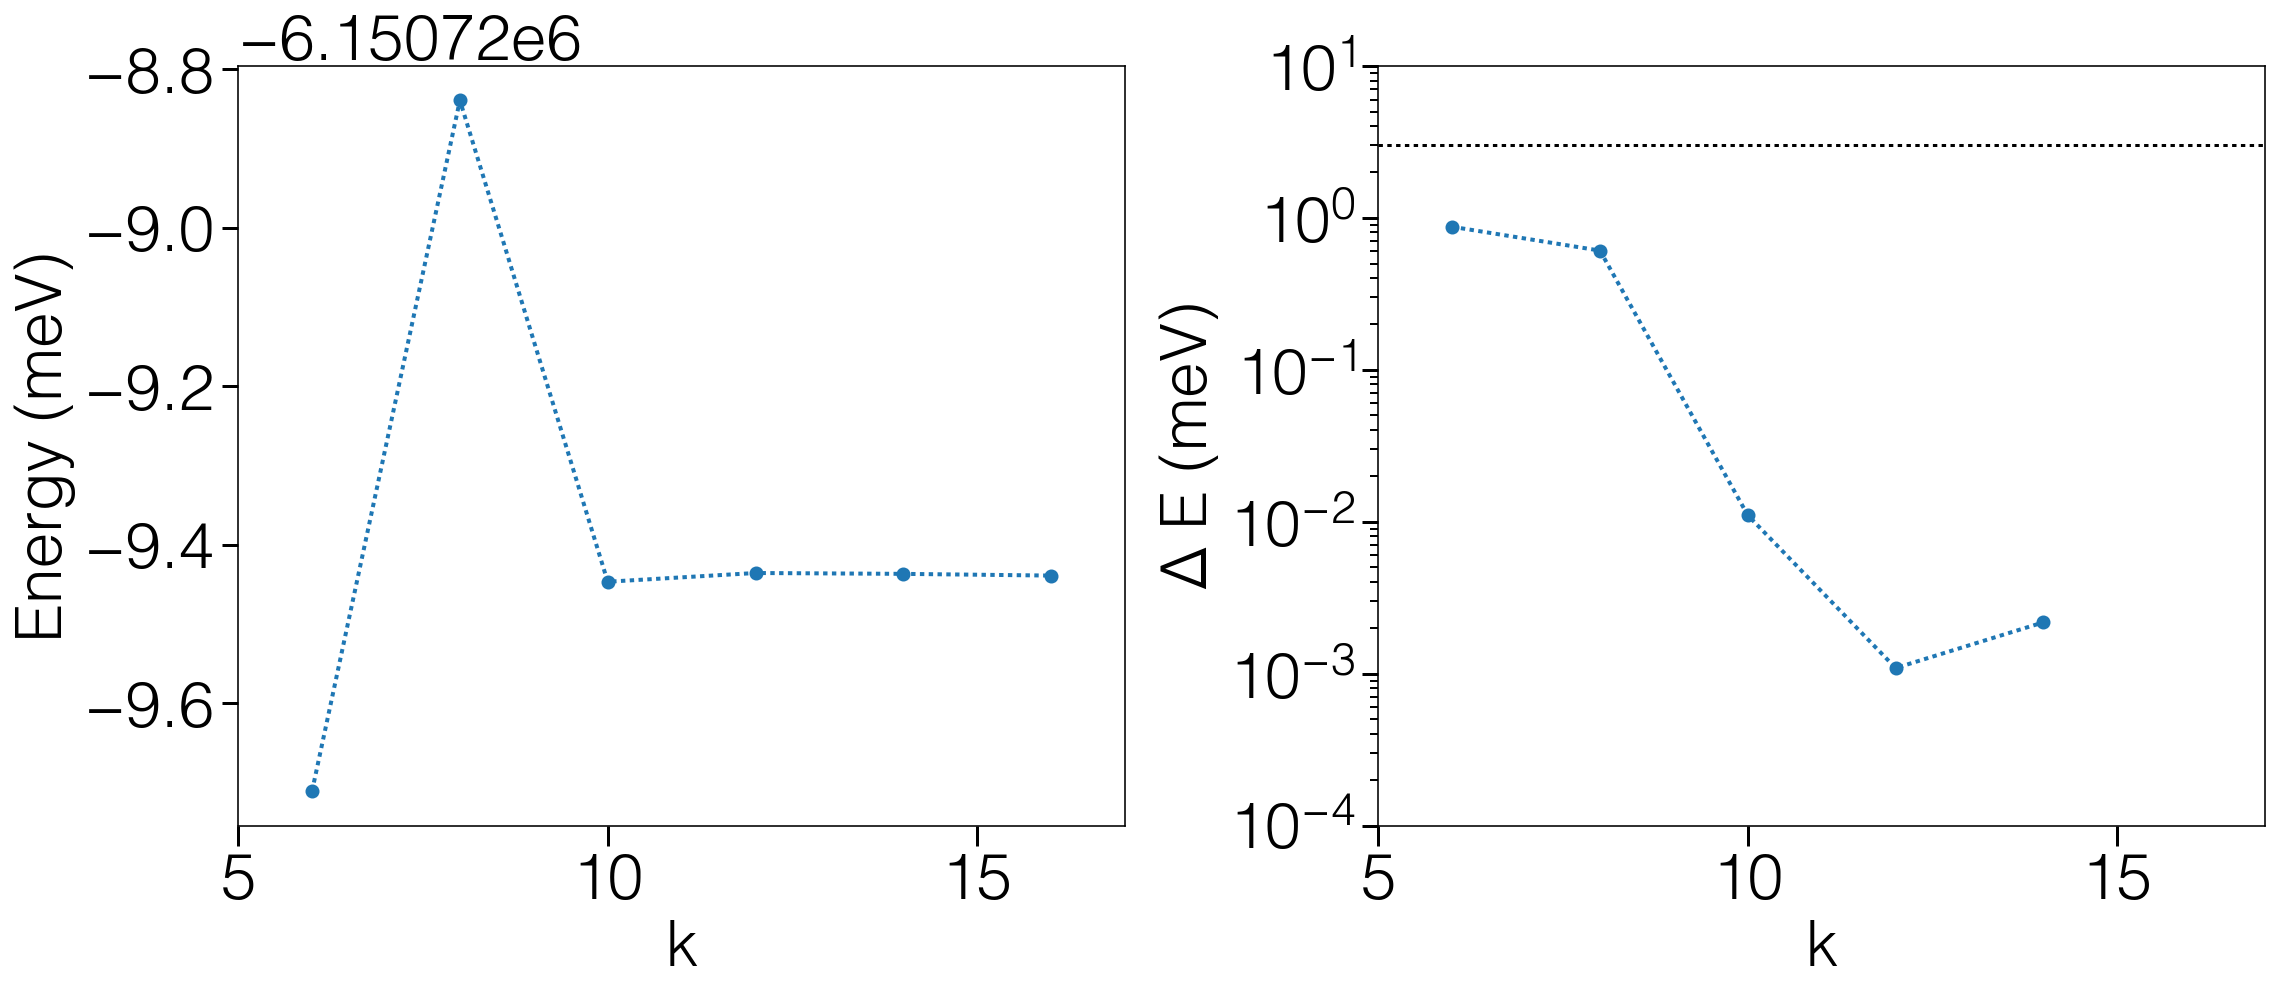

In [17]:
%matplotlib inline
# Convergence Function
def conv(arr):
    arr_conv=abs(arr[1::]-arr[0:-1:])
    arr_conv=np.append(arr_conv,None)
    return arr_conv
# Read data files
path='../../../MoSe2/Bulk/Relaxed/relax/'

f_1A='k_F_E.txt'
data_1A=pd.read_csv(path+f_1A,delimiter='\t\t',names=['k','Force (Ry/Bohr)','Energy (Ry)'],
                    skiprows=[0],engine='python');

# Convert to Ev-s and AA-s
ry2eV=13.605698
bohr2AA=0.529177
data_1A['Force (meV/Å)']=data_1A['Force (Ry/Bohr)']*ry2eV*10**3/bohr2AA
data_1A['Energy (meV)']=data_1A['Energy (Ry)']*ry2eV*10**3

# Convergence
Delta_alat_vec=np.array([])
data_1A['Force_conv']=conv(np.array(data_1A['Force (meV/Å)'].values))
data_1A['Energy_conv']=conv(np.array(data_1A['Energy (meV)'].values))

# Force Plot
fig1=plt.figure(figsize=(16,7))
ax1=fig1.add_subplot(121)
ax1.plot(data_1A['k'],data_1A['Force (meV/Å)'],linewidth=2,marker='o',linestyle=':')
ax1.set_ylim([364,369])
ax1.set_xlim([5,17])
ax1.set_xlabel('k')
ax1.set_ylabel('Force (meV/Å)')

ax2=fig1.add_subplot(122)
ax2.semilogy(data_1A['k'].values[:-1:],data_1A['Force_conv'].values[:-1:],linewidth=2,marker='o',linestyle=':')
ax2.set_ylim([10**-2,10**1])
ax2.set_xlim([5,17])
ax2.set_xlabel('k')
ax2.set_ylabel(r'$\Delta$ F (meV/Å)')

# Energy Plot
fig1=plt.figure(figsize=(16,7))
ax1=fig1.add_subplot(121)
ax1.plot(data_1A['k'],data_1A['Energy (meV)'],linewidth=2,marker='o',linestyle=':')
#ax1.set_ylim([5.39,5.4])
ax1.set_xlim([5,17])
ax1.set_xlabel('k')
ax1.set_ylabel('Energy (meV)')

ax2=fig1.add_subplot(122)
ax2.semilogy(data_1A['k'].values[:-1:],data_1A['Energy_conv'].values[:-1:],linewidth=2,marker='o',linestyle=':')
ax2.set_ylim([10**-4,10])
ax2.set_xlim([5,17])
ax2.set_xlabel('k')
ax2.set_ylabel(r'$\Delta$ E (meV)')
ax2.axhline(3,linestyle=':',color='k')

$\color{red}{\text{k k k = 10 10 10}}$

## Single v-c relax:

In [5]:
data_bohr=np.array([[1.0,3.930300],[0.987339,3.867392]])*6.215300
data_AA=data_bohr*bohr2AA
print('a = '+str(0.987339*6.215300))
print('dim3 = '+str(3.867392/0.987339))
T=pd.DataFrame(data_AA,columns=['a (Å)','c (Å)'],index=['initial','relaxed'])
T

a = 6.1366080867
dim3 = 3.9169849464064526


,a (Å),c (Å)
initial,3.288994,12.926732
relaxed,3.247352,12.719828


## Energy Surface 1:

(3.1, 3.4)

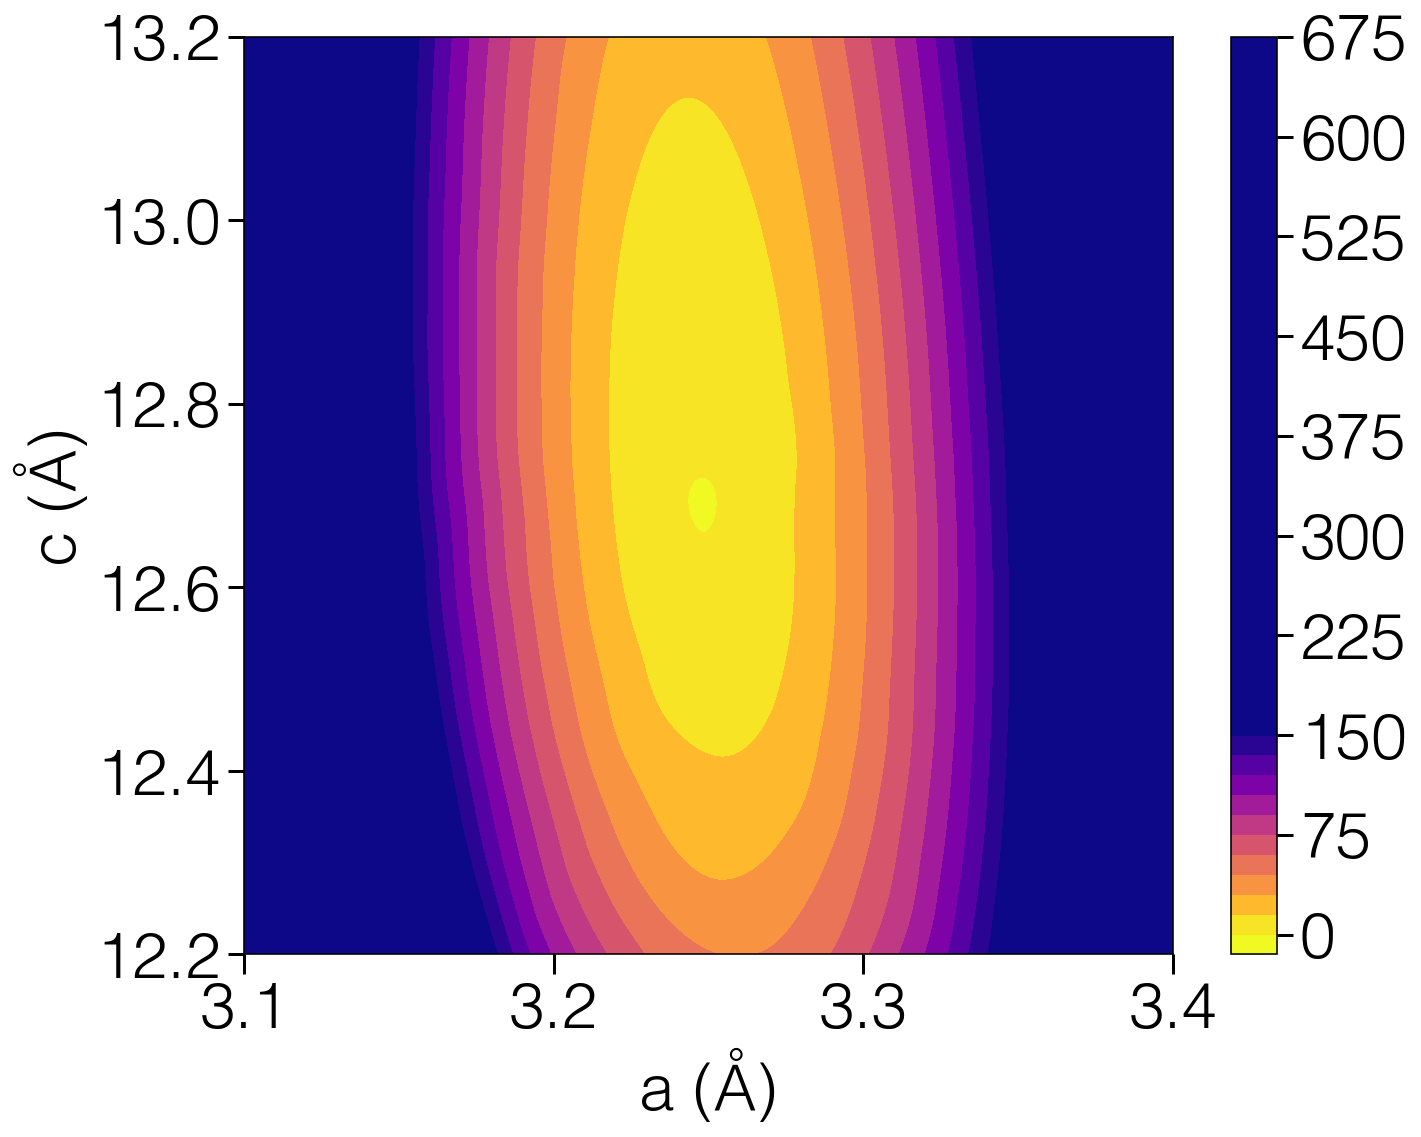

In [7]:
%matplotlib inline
from scipy.interpolate import griddata
ry2eV=13.605698

path='../../../MoSe2/Bulk/Relaxed/relax/'

PES_f='a_c_E.txt'
PES_data=pd.read_csv(path+PES_f,delimiter='\t\t',names=['a (AA)','c (AA)','E (Ry)'],
                     skiprows=[0],engine='python');
PES_data['E (eV)']=np.array(PES_data['E (Ry)'])*ry2eV*10**3

# Vector Data
a_data=np.array(PES_data['a (AA)'].values)
c_data=np.array(PES_data['c (AA)'].values)
E_data=np.array(PES_data['E (eV)'].values)-min(np.array(PES_data['E (eV)'].values))

# Interpolation
a_inter=np.linspace(min(a_data),max(a_data),500); #print(a_inter)
c_inter=np.linspace(min(c_data),max(c_data),500); #print(c_inter)
A,C=np.meshgrid(a_inter,c_inter)

E_inter=griddata((a_data,c_data),E_data,(A,C),method='cubic')
fig=plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
cf=ax1.contourf(A,C,E_inter,50,cmap=mpl.cm.plasma_r,vmin=0.0,vmax=150)
#ax1.scatter(a_data,c_data,marker = 'o', c = 'white', s = 10, zorder = 10)
fig.colorbar(cf) # draw colorbar
ax1.set_xlabel('a (Å)')
ax1.set_ylabel('c (Å)')
ax1.set_ylim([12.2,13.2])
ax1.set_xlim([3.1,3.4])

## Energy Surface 2:

0.000260308777555
0.00101962549098
[ 3.24774246] [ 12.7356322]


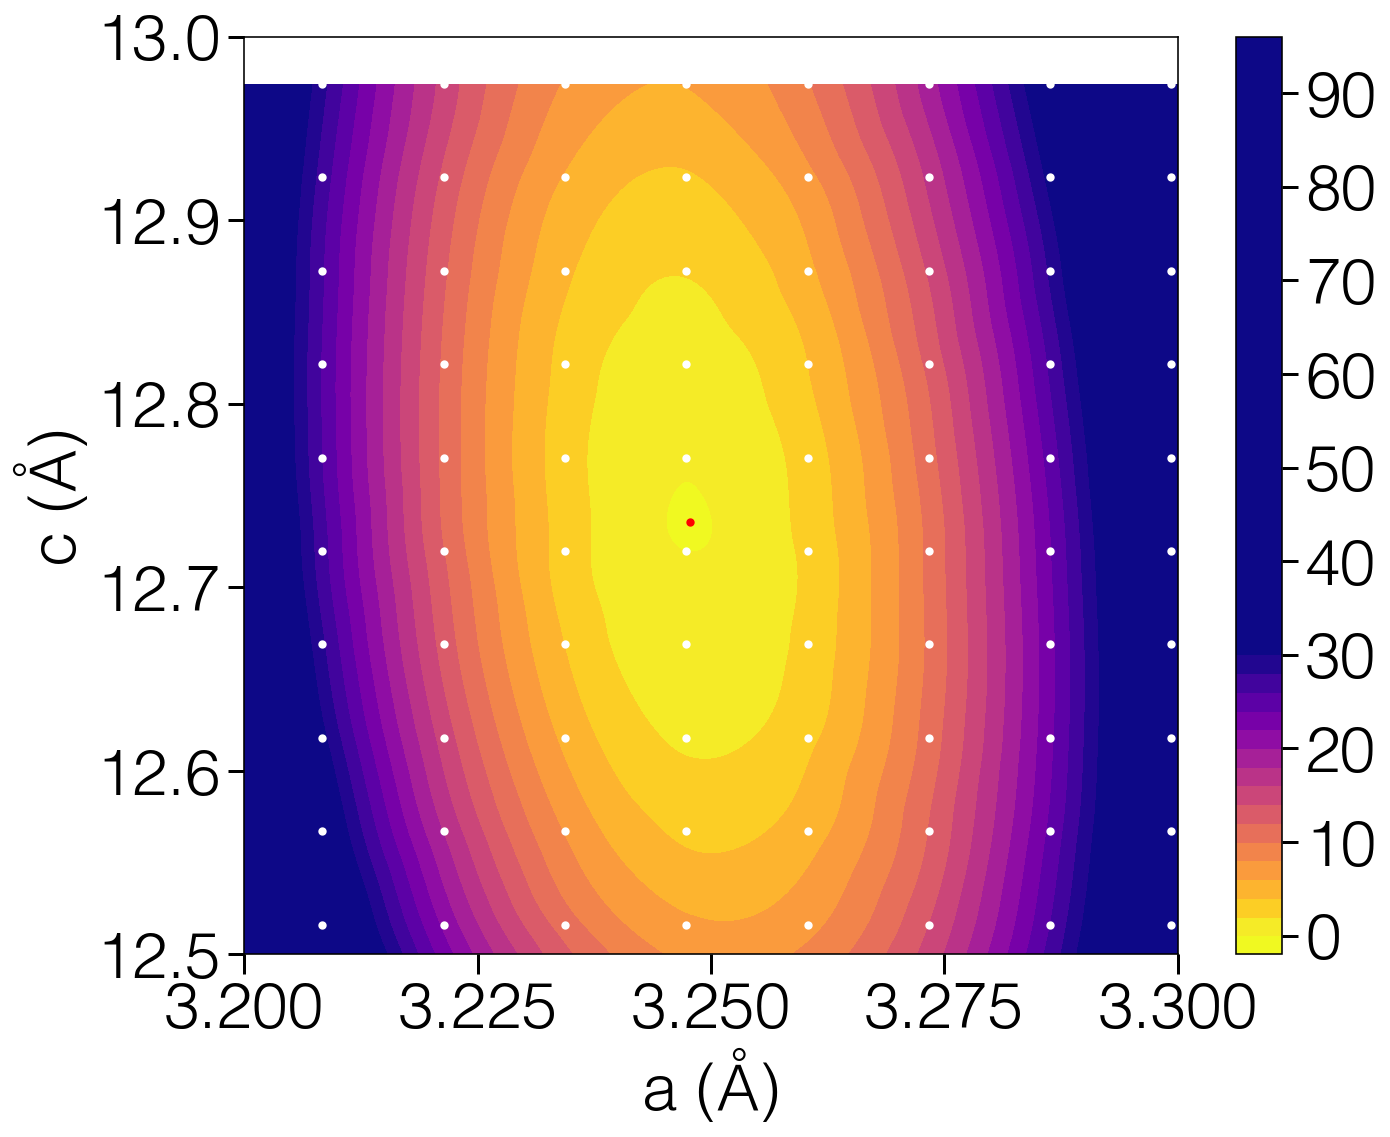

In [45]:
%matplotlib inline
from scipy.interpolate import griddata
ry2eV=13.605698

path='../../../MoSe2/Bulk/Relaxed/relax/'

PES_f='a_c_E_2.txt'
PES_data=pd.read_csv(path+PES_f,delimiter='\t\t',names=['a (AA)','c (AA)','E (Ry)'],
                     skiprows=[0],engine='python');
PES_data['E (eV)']=np.array(PES_data['E (Ry)'])*ry2eV*10**3

# Vector Data
a_data=np.array(PES_data['a (AA)'].values)
c_data=np.array(PES_data['c (AA)'].values)
E_data=np.array(PES_data['E (eV)'].values)-min(np.array(PES_data['E (eV)'].values))

# Interpolation
a_inter=np.linspace(min(a_data),max(a_data),500); print(a_inter[1]-a_inter[0])
c_inter=np.linspace(min(c_data),max(c_data),500); print(c_inter[1]-c_inter[0])
A,C=np.meshgrid(a_inter,c_inter)

E_inter=griddata((a_data,c_data),E_data,(A,C),method='cubic')
# E_bot=E_inter[E_inter<0]
# A_bot=A[E_inter<0]
# C_bot=C[E_inter<0]
E_min=np.amin(E_inter)
A_min=A[E_inter==E_min]
C_min=C[E_inter==E_min]

fig=plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
cf=ax1.contourf(A,C,E_inter,60,cmap=mpl.cm.plasma_r,vmin=0.0,vmax=30)
ax1.scatter(a_data,c_data,marker = 'o', c = 'white', s = 10, zorder = 10)
ax1.scatter(A_min,C_min,marker = 'o', c = 'r', s = 10, zorder = 10)
fig.colorbar(cf) # draw colorbar
ax1.set_xlabel('a (Å)')
ax1.set_ylabel('c (Å)')
ax1.set_ylim([12.5,13])
ax1.set_xlim([3.2,3.3])
print(A_min,C_min)

minimum:
 - $a=3.24774246$ Å
 - $c=12.7356322$ Å